<a href="https://colab.research.google.com/github/sapinspys/lambda-ds-precourse/blob/master/LSDS_Intro_Day_6_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra Applications Assignment





### Your data:

**chirps_per_sec** = chirps/sec for the striped ground cricket

**temperature** = temperature in degrees Fahrenheit

Reference: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

In [2]:
!pip install xlrd
import pandas as pd

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls')
df = df.rename(columns={'X':'chirps_per_sec', 'Y':'temperature'})

print(df.shape)
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
(15, 2)


,chirps_per_sec,temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


## 1) Graph a scatterplot of chirps_per_sec vs temperature 

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df.temperature,df.chirps_per_sec)
plt.title("Striped Ground Cricket Chirps by Temperature")
plt.xlabel("Temperature (C)")
plt.ylabel("Chirps per Second")
plt.grid(alpha=0.7)
plt.show()

<IPython.core.display.Javascript object>

## 2) Follow the steps below to compute the coefficients (intercept and slope) for the line of best fit:

## 2.1) Use np.ones to add a column of ones to the dataframe

In [4]:
import numpy as np

df["ones"] = np.ones((15,1))
df.describe()

,chirps_per_sec,temperature,ones
count,15.000000,15.000000,15.0
mean,16.653333,80.040000,1.0
std,1.702044,6.707332,0.0
min,14.400000,69.400002,1.0
25%,15.450000,75.750000,1.0
50%,16.200001,80.599998,1.0
75%,17.150001,83.400002,1.0
max,20.000000,93.300003,1.0


## 2.2) Create your X matrix from the 'ones' and 'temperature' columns

In [5]:
X = np.matrix(df[["ones", "temperature"]].to_numpy())
X

matrix([[ 1.        , 88.59999847],
        [ 1.        , 71.59999847],
        [ 1.        , 93.30000305],
        [ 1.        , 84.30000305],
        [ 1.        , 80.59999847],
        [ 1.        , 75.19999695],
        [ 1.        , 69.69999695],
        [ 1.        , 82.        ],
        [ 1.        , 69.40000153],
        [ 1.        , 83.30000305],
        [ 1.        , 79.59999847],
        [ 1.        , 82.59999847],
        [ 1.        , 80.59999847],
        [ 1.        , 83.5       ],
        [ 1.        , 76.30000305]])

## 2.3) Create your Y vector from the chips_per_sec column. (Make sure that it is formatted as a column vector.)

In [6]:
Y = df["chirps_per_sec"].to_numpy().reshape(15,1)
Y

array([[20.        ],
       [16.        ],
       [19.79999924],
       [18.39999962],
       [17.10000038],
       [15.5       ],
       [14.69999981],
       [17.10000038],
       [15.39999962],
       [16.20000076],
       [15.        ],
       [17.20000076],
       [16.        ],
       [17.        ],
       [14.39999962]])

## 2.4) Calculate X_transpose and print the result: $X^{T}$ 

In [7]:
X_transpose = np.transpose(X)
X_transpose

matrix([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847,
         75.19999695, 69.69999695, 82.        , 69.40000153, 83.30000305,
         79.59999847, 82.59999847, 80.59999847, 83.5       , 76.30000305]])

## 2.5) Calculate X_transpose_X and print the result: $X^{T}X$

In [8]:
X_transpose_X = np.dot(X_transpose, X)
X_transpose_X

matrix([[1.50000000e+01, 1.20060000e+03],
        [1.20060000e+03, 9.67258599e+04]])

## 2.6) Calculate the inverse of X_transpose_X and print the result: $(X^{T}X)^{-1}$ 

In [9]:
inverse = np.linalg.inv(X_transpose_X)
inverse

matrix([[ 1.02382034e+01, -1.27080669e-01],
        [-1.27080669e-01,  1.58771451e-03]])

## 2.7) An aside: Multiply the X_tranpose_X matrix against its inverse: $(X^{T}X)(X^{T}X)^{-1}$  Print the result. What is the name for the resulting matrix?

In [10]:
m_identity = np.dot(X_transpose_X, inverse)
m_identity

# IDENTITY MATRIX

matrix([[1.00000000e+00, 6.01565053e-17],
        [3.50588784e-13, 1.00000000e+00]])

## 2.8) Calculate X_transpose_Y and print the result: $X^{T}Y$

In [11]:
X_transpose_Y = np.dot(X_transpose, Y)
X_transpose_Y

matrix([[  249.80000019],
        [20127.47000262]])

## 2.9) Finally, calculate the Beta coefficients vector by multiplying the left and right halfs of the linear regression equation. Print the Beta vector: $\beta = (X^{T}X)^{-1} X^{T}Y$  
(You should have all of the parts to do this now)

In [12]:
beta_coeff = np.dot(inverse, X_transpose_Y)
beta_coeff

matrix([[-0.3091419 ],
        [ 0.21192498]])

## 3) Graph the line of best fit through the scatterplot of the data points

In [0]:
beta_0 = beta_coeff[0,0]
beta_1 = beta_coeff[1,0]

y_hat = [beta_1*x + beta_0 for x in df.temperature]

plt.scatter(df.temperature,df.chirps_per_sec, color='k')
plt.title("Striped Ground Cricket Frequency by Temperature")
plt.xlabel("Temperature (C)")
plt.ylabel("Chirps per Second")
plt.plot(df.temperature, y_hat)
plt.grid(alpha=0.7)
plt.show()

## 4) If a cricket has chirped 19 times in a second what is the predicted temperature? Plot this prediction as well.

In [14]:
chirp_frequency = 19
# chirp_frequency = beta1*predicted_temp + beta0
predicted_temp = (chirp_frequency - beta_0)/beta_1
print(predicted_temp)

plt.scatter(df.temperature,df.chirps_per_sec, color='k', label="")
plt.title("Striped Ground Cricket Frequency by Temperature")
plt.xlabel("Temperature (C)")
plt.ylabel("Chirps per Second")
plt.plot(df.temperature, y_hat)
plt.plot(predicted_temp, chirp_frequency, marker="x", color = 'r', markersize=15, label="prediction_1")
plt.grid(alpha=0.7)
plt.legend()
plt.show()

91.11310072893363


##Stretch Problem
Let's add a 3rd dimension. 

X1 = systolic blood pressure

X2 = age in years

X3 = weight in pounds

Compute the coefficients for the **plane** of best fit for

$X_1 = \beta_1X_2 + \beta_2X_3 + \beta_0$

Then graph the plane in addition to the  datapoints in a **3D** graph.
An article to get you started on [3D graphing](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [15]:
s_data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
print(s_data.head())
s_data.shape

*** No CODEPAGE record, no encoding_override: will use 'ascii'
    X1  X2   X3
0  132  52  173
1  143  59  184
2  153  67  194
3  162  73  211
4  154  64  196


(11, 3)

## How to find beta coefficients:

If $X_1 = \beta_1X_2 + \beta_2X_3 + \beta_0$,

Then:

$ \begin {bmatrix} X1_0 \\ X1_1 \\ ... \\ X1_n\end{bmatrix} $ = $ \begin {bmatrix} X2_0  &   X3_0 & 1\\  X2_1  &  X3_1 & 1 \\ ...\\  X2_n  &  X3_n & 1 \end{bmatrix} \begin {bmatrix} a \\ b \\ c \end{bmatrix} $

And: 

$ \begin {bmatrix} a \\ b \\ c \end{bmatrix} $ = $ (1/(A^TA))A^Tv $

In [16]:
# Add column of 1s to solve for slope and intercept values

s_data["ones"] = np.ones(11)
s_data.head()

,X1,X2,X3,ones
0,132,52,173,1.0
1,143,59,184,1.0
2,153,67,194,1.0
3,162,73,211,1.0
4,154,64,196,1.0


In [17]:
A = np.matrix(s_data[["ones","X2", "X3"]].to_numpy())
v = s_data["X1"].to_numpy().reshape(11,1)

beta_coeff = np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.dot(np.transpose(A), v))
beta_coeff

matrix([[30.99410295],
        [ 0.86141469],
        [ 0.3348592 ]])

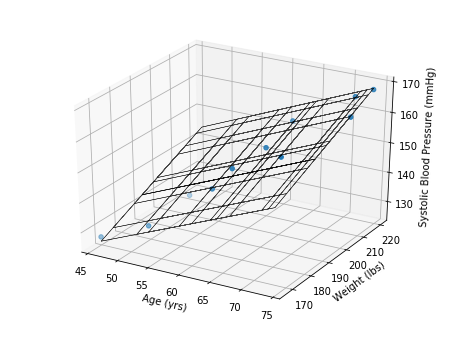

In [54]:
from mpl_toolkits.mplot3d import Axes3D # Register 3D projection

%matplotlib inline

beta_1 = beta_coeff[0,0]
beta_2 = beta_coeff[1,0]
beta_3 = beta_coeff[2,0]

# First attempt.. working.. but  not the right shape
# X_1_predicted = []
# for X_2 in s_data.X2:
#   for X_3 in s_data.X3:
#     X_hat = beta_1*X_2 + beta_2*X_3 + beta_3 
#     X_1_predicted.append(X_hat)
    
# https://math.stackexchange.com/questions/99299/best-fitting-plane-given-a-set-of-points
X,Y = np.meshgrid(s_data.X2, s_data.X3) 
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = beta_2 * X[r,c] + beta_3 * Y[r,c] + beta_1

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")

ax.scatter3D(s_data.X2, s_data.X3, s_data.X1)
ax.plot_wireframe(X, Y, Z, color="k", alpha=0.7, lw=0.5)
ax.set_zlabel('Systolic Blood Pressure (mmHg)')
ax.set_xlabel('Age (yrs)')
ax.set_ylabel('Weight (lbs)')
ax.dist = 11
plt.show()